<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793546-Ariel-Corral-Leon/blob/main/Actividad_Semana_8_M%C3%A1quina_de_Vector_Soporte_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://static.wikia.nocookie.net/tecdemonterrey/images/1/1b/Logo_Tec_azul.png/revision/latest?cb=20190219041656&path-prefix=es" width="230" />

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte (SVM)**

----

**Datos generales**
---
**EQUIPO 52**

**Integrantes:**

| Nombre | matricula de los integrantes del equipo
|---|---|
| Helmy Andrea Moreno Navarro | **A01793918** |
| José Santiago Rueda Antonio | **A01794118** |
| Eddie Guadalupe Elorza Ruiz | **A01793547** |
| Saúl Yovani Salgueiro Lindoro |**A01633510**|
| José Ariel Corral León | **A01793546** |


>**Materia:** Inteligencia Artificial y Aprendizaje Automático (Gpo 10)

>**Profesor Titular:** Luis Eduardo Falcón Morales


07 de noviembre 2022

-----

Se trabajará con el conjunto de datos conocido como "Australian credit approval", un problema de 
clasificación que ya has estudiado en semanas previas y cuyos datos puedes encontrar en la siguiente 
liga del repositorio de la UCI: 
https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29  
El objetivo es determinar si se autoriza una tarjeta de crédito dada cierta información del solicitante. En 
la página de la UCI encuentras mayor información sobre el problema. 

----

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns  
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate,  RepeatedKFold,GridSearchCV, learning_curve
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler,FunctionTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,confusion_matrix, RocCurveDisplay, roc_auc_score
from sklearn import metrics

### **1.  Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0**

In [ ]:
column_names = [f'A{x}' for x in range(1,16)]
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat', names=column_names, sep=" ") # llamando la base de datos considerando un " " como el separador de los datos
df.index.name = None
df


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
random_state_v = 0 #aqui nos ahorarremos el esfuerzo de estar definiendo el random_state de futuros pasos para definirlo desde aqui

In [ ]:
X = df.iloc[0:, 0:14]
y = df.iloc[:, -1]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.15, random_state=random_state_v) #aqui estamos definiendo nuestros segmentos de datos para el modelo de entrenamiento
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape) # aqui estamos mostrando las características dimensionales de dichas particiones

(586, 14) (104, 14) (586,) (104,)


### **2.  Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas.**
Utiliza un Pipeline para evitar el filtrado de información.

In [ ]:
X_train.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


A1: 0,1 CATEGORICAL (formerly: a,b).  
A2: continuous.   
A3: continuous.   
A4: 1,2,3 CATEGORICAL (formerly: p,g,gg).  
A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x).  
A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z).  
A7: continuous.   
A8: 1, 0 CATEGORICAL (formerly: t, f).  
A9: 1, 0 CATEGORICAL (formerly: t, f).  
A10: continuous.   
A11: 1, 0 CATEGORICAL (formerly t, f).  
A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p).  
A13: continuous.   
A14: continuous.

In [ ]:
categoricas = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']
numericas =['A2', 'A3', 'A7', 'A10', 'A13', 'A14']

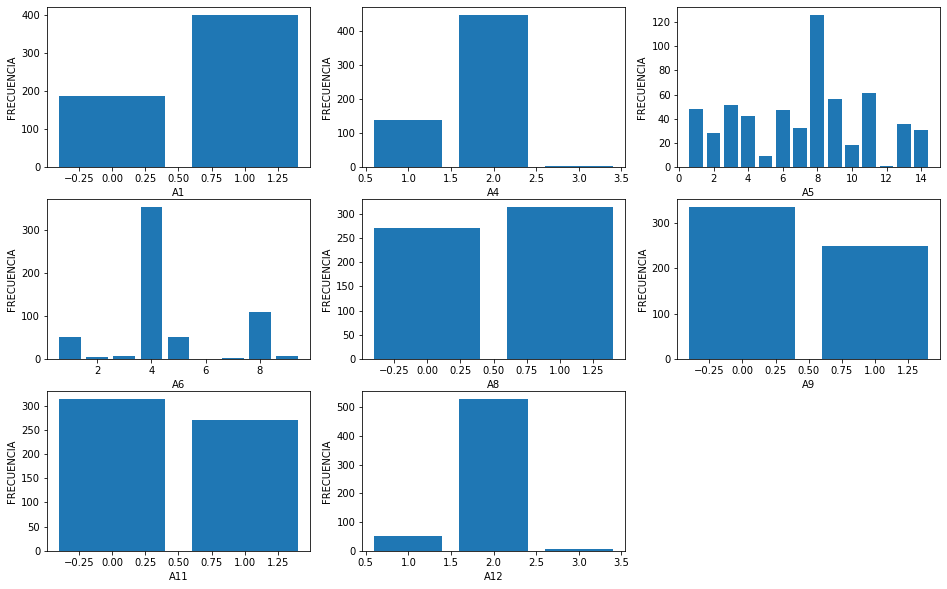

In [ ]:
fig = plt.figure(figsize = (16, 10))
for i in range(0,len(categoricas)):
  plt.subplot(3,3,1+i) 
  plt.bar(X_train[categoricas[i]].value_counts().sort_index(ascending=True).index
          ,X_train[categoricas[i]].value_counts().sort_index(ascending = True))
  plt.xlabel(f'{categoricas[i]}')
  plt.ylabel('FRECUENCIA')
plt.show()

In [ ]:
np.log(X_train[numericas])

,A2,A3,A7,A10,A13,A14
242,3.901973,2.026173,2.026173,2.708050,-inf,8.517393
18,2.995732,0.223144,-2.079442,-inf,4.941642,1.609438
490,3.317091,0.712950,0.693147,1.098612,5.913503,6.329721
475,3.160399,-0.776529,0.965081,1.791759,5.337538,5.852202
55,3.326115,0.405465,0.693147,2.397895,6.073045,3.583519
...,...,...,...,...,...,...
359,3.225653,1.098612,0.223144,0.000000,-inf,3.135494
192,3.352707,1.264127,-0.693147,-inf,5.141664,0.000000
629,3.208825,-0.616186,0.000000,-inf,4.787492,0.693147
559,3.864302,-1.237874,2.708050,2.995732,-inf,9.615872


In [ ]:
# mu = 0
# variance = 1
# sigma = math.sqrt(variance)
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# plt.plot(x, stats.norm.pdf(x, mu, sigma))
# plt.show()
# # https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution

In [ ]:
# Transf0.hist()

In [ ]:
# X_train['A2'].value_counts(ascending=False)

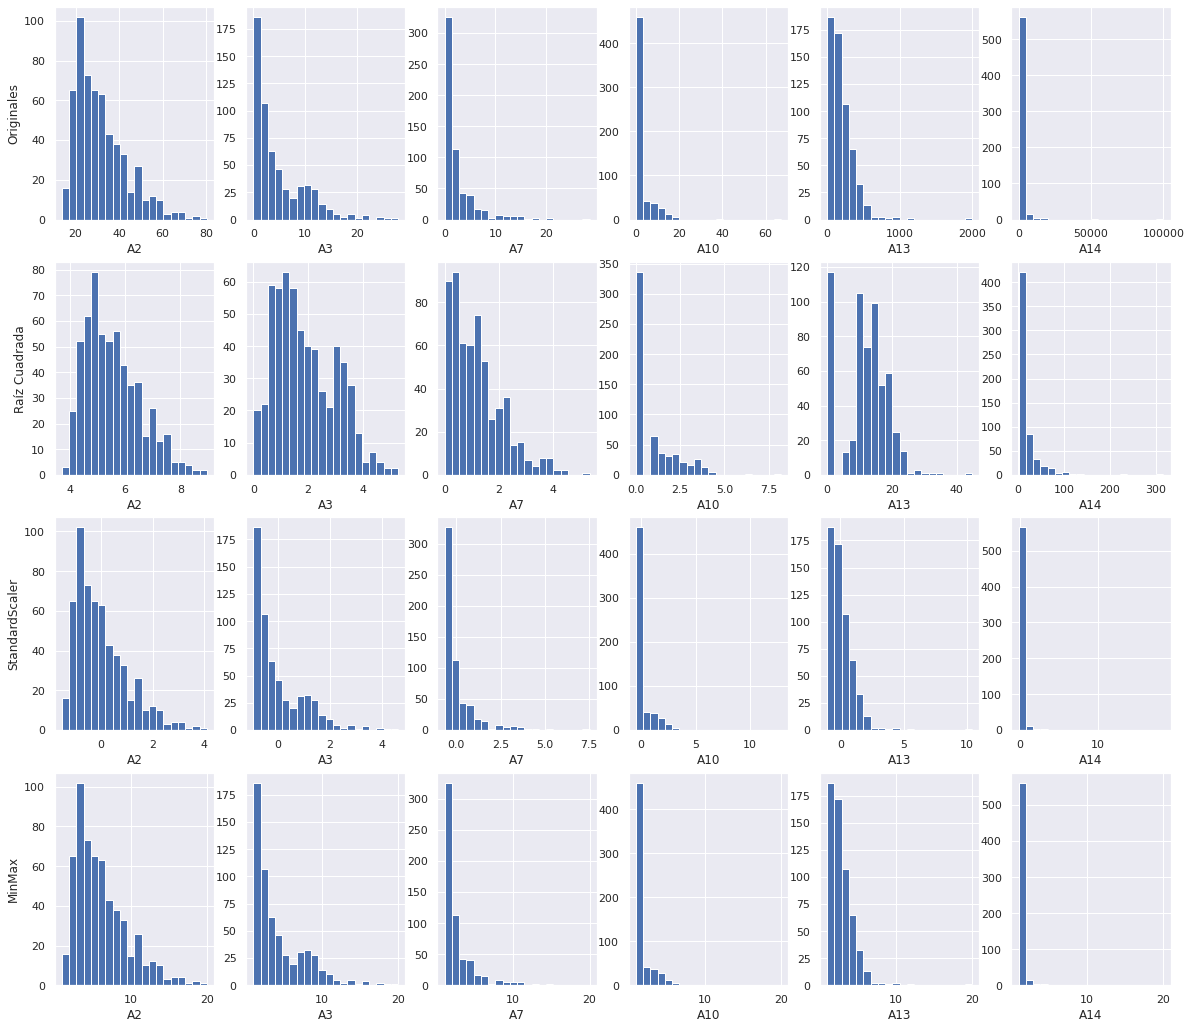

In [ ]:
total_cuantitativas = len(numericas)
sns.set(rc={'figure.figsize':(20,18)})
fig, axes = plt.subplots(4, total_cuantitativas)    

for i in range(0,total_cuantitativas):


  # Datos originales ---------------------------------------------------------
  plt.subplot(4,total_cuantitativas,i+1) 
  Transf0 = X_train[numericas[i]]
  plt.hist(Transf0,bins=20)
  # plt.plot(Transf0.index,Transf0 , 'k', linewidth=2)
  plt.xlabel(numericas[i])
  if i==0:
    plt.ylabel('Originales')



  # Datos transformados con raíz cuadrada ------------------------------------
  plt.subplot(4,total_cuantitativas,i+7)    
  Transf1 = np.sqrt(X_train[numericas[i]].to_numpy())
  plt.hist(Transf1,bins=20)                     
  plt.xlabel(numericas[i])
  if i==0:
    plt.ylabel('Raíz Cuadrada')


    
  # Datos transformados con logaritmo natural --------------------------------
  plt.subplot(4,total_cuantitativas,i+13)     
  Transf2 = StandardScaler().fit_transform(X_train[numericas[i]].to_numpy().reshape(-1, 1))
  plt.hist(Transf2,bins=20)                    
  plt.xlabel(numericas[i])
  if i==0:
    plt.ylabel('StandardScaler')



  # Datos transformados con MinMax ---------------------------------
  plt.subplot(4,total_cuantitativas,i+19)
  minmax = MinMaxScaler(feature_range=(1,20))
  minmax.fit(X_train[numericas[i]].to_numpy().reshape(-1, 1))
  Transf3 = minmax.transform(X_train[numericas[i]].to_numpy().reshape(-1, 1))
  plt.hist(Transf3,bins=20) 
  plt.xlabel(numericas[i])
  if i==0:
    plt.ylabel('MinMax')


Podemos observar que al estar realizando nuestras tansformaciones nos percatamos que el proceso logarítmico nos arrojo errores y bueno al realizar una inspección al dataset, nos dimos cuenta que hay valores con "0" y sabemos que matemáticamente log 0 es infinito lo que nos impide realizar el procesamiento.Tras estar intentando resolver este inconveniente, buscamos varias alternativas y optamos por buscar la forma de obtener una mejor elección de procesamiento que nos permitiera identificar que nuestro procesamiento se encuentra centrado, Al estar realizando diversas gráficas logramos concluir que el procesamiento sería escasamente escalar ya que como sabemos estamos realizando el desarrollo de un modelo para poder resolver casos futuros y no únicamente la resolución de este problema.

In [ ]:
pipeline_numericas = Pipeline(steps = [('imputer', SimpleImputer()),
                                        ('SQRT', FunctionTransformer(np.sqrt))])

In [ ]:
OneHotEncoder,
pipeline_categorica = Pipeline(steps = [('imputer_cat', SimpleImputer()),
                                        ('encoder', OneHotEncoder(handle_unknown='ignore'))])

transformer = ColumnTransformer(transformers=[
    ('numericas', pipeline_numericas, numericas),
    ('category', pipeline_categorica, categoricas),
   ],
    remainder='passthrough')
## EJEMPLO DE COMO LO TRANSFORMA
datosTransformados = transformer.fit_transform(X_train)
pd.DataFrame(datosTransformados)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,7.035624,2.754088,2.754088,3.872983,0.000000,70.717749,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,4.472136,1.118034,0.353553,0.000000,11.832160,2.236068,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,5.251666,1.428286,1.414214,1.732051,19.235384,23.685439,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.855924,0.678233,1.620185,2.449490,14.422205,18.654758,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.275415,1.224745,1.414214,3.316625,20.832667,6.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,5.016971,1.732051,1.118034,1.000000,0.000000,4.795832,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
582,5.346027,1.881489,0.707107,0.000000,13.076697,1.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
583,4.974937,0.734847,1.000000,0.000000,10.954451,1.414214,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
584,6.904346,0.538516,3.872983,4.472136,0.000000,122.478570,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


***A pesar de que nuestra fuente cita datos faltantes, realizamos diversos muestreos y búsquedas de campos faltantes, al no poder identificar dichos campos faltantes, procedimos a continuar con los procedimientos previamente definidos***



### **3.  Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto que tienes de datos de entrenamiento y validación.** 
Obtener los valores de partida (baseline) de las siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?

In [ ]:
X_train_Dummy, X_val_Dummy, y_train_Dummy, y_val_Dummy = train_test_split(X_train, y_train, train_size= 0.85, random_state=random_state_v) # aqui estamos restructurando nuevamente nuestros datos 

In [ ]:
X_train_Dummy.shape

(498, 14)

In [ ]:
X_val_Dummy.shape

(88, 14)

In [ ]:
def print_evaluation(y_true, y_pred):
    results_dict = {'accuracy': accuracy_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'f1_score': f1_score(y_true, y_pred)}
    return results_dict

In [ ]:
FuncDummy = DummyClassifier(strategy='stratified',)
pipeline = Pipeline(steps=[('ct',transformer),  ('m',FuncDummy)]) # conformando el pipeline para su ejecución con los parametros

# Construimos el modelo con las transformaciones de la
# variable de entrada y la variable de salida:
modelo = TransformedTargetRegressor(regressor=pipeline)

In [ ]:
# Entrenamos el modelo: Este proceso puede tardar un poco en ejecutarse 
# debido a que se están realizando muchas transformaciones.
modelo.fit(X_train_Dummy, y_train_Dummy)   # ajustando el modelo con los datos de entrenamiento

# Generemos nuestras propia lista de resultados para nuestras propias curvas de aprendizaje:

train_yhat = modelo.predict(X_train_Dummy) # predicciones de "y" para el conjunto de entrenamiento
print_evaluation(y_train_Dummy, train_yhat)        # calculamos el RMSE para el conjunto de entrenamiento

{'accuracy': 0.5,
 'recall': 0.42792792792792794,
 'precision': 0.4377880184331797,
 'f1_score': 0.4328018223234624}

Tras estar realizando los ejercicio logramos obtener un 50% de precisión, mostrando que tan centrado puede estar nuestro proceso, tenemos una precisión del 43% y un recall (o sensibilidad) del 42%, esto nos arrojaría un F1 Score de 43% el cual está por debajo de la media (abajo del .5) lo que nos indica que el comportamiento podría no estar siendo el deseado.

### **4.  Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros  con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior.**

In [ ]:
scores ={
                  "accuracy": make_scorer(accuracy_score),
                  "precision": make_scorer(precision_score),
                  "recall": make_scorer(recall_score),
                  "f1score": make_scorer(f1_score)
                }

In [ ]:
def mi_grid_search(modelo ,X, y, parametros,score):
  pipeline = Pipeline(steps=[('preprocess', transformer),('model', modelo)])
  KFold = RepeatedKFold(n_splits=2, n_repeats=1, random_state=random_state_v)
  #Preguntar de dónde tomo los parámetros

  mi_grid = GridSearchCV(modelo,
                      param_grid=parametros,
                      scoring=score,
                      cv=KFold                    
                      )
  mi_grid.fit(X, y)
  
  print('Mejor valor de exactitud obtenido con la mejor combinación:', mi_grid.best_score_)
  print('Mejor combinación de valores encontrados de los hiperparámetros:', mi_grid.best_params_)
  print('Métrica utilizada:', mi_grid.scoring)
  return mi_grid.best_params_, mi_grid.scoring

In [ ]:
param_grid={'C': [0.01, 0.1,1,10,100], 'kernel':['linear','rbf','sigma']}

In [ ]:
resultados = list()

In [ ]:
for name,score in scores.items():
  best_params, resultado = mi_grid_search(SVC(random_state=random_state_v),X_train,y_train,param_grid,score)
  resultados.append({name:{'best_params':best_params,'resultado':resultado}})

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

Mejor valor de exactitud obtenido con la mejor combinación: 0.8651877133105802
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1, 'kernel': 'linear'}
Métrica utilizada: make_scorer(accuracy_score)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------------

Mejor valor de exactitud obtenido con la mejor combinación: 0.8435429056924384
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.01, 'kernel': 'linear'}
Métrica utilizada: make_scorer(precision_score)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

Mejor valor de exactitud obtenido con la mejor combinación: 0.9042058823529412
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1, 'kernel': 'linear'}
Métrica utilizada: make_scorer(recall_score)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

Mejor valor de exactitud obtenido con la mejor combinación: 0.8570881226053639
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1, 'kernel': 'linear'}
Métrica utilizada: make_scorer(f1_score)


In [ ]:
resultados

[{'accuracy': {'best_params': {'C': 1, 'kernel': 'linear'},
   'resultado': make_scorer(accuracy_score)}},
 {'precision': {'best_params': {'C': 0.01, 'kernel': 'linear'},
   'resultado': make_scorer(precision_score)}},
 {'recall': {'best_params': {'C': 1, 'kernel': 'linear'},
   'resultado': make_scorer(recall_score)}},
 {'f1score': {'best_params': {'C': 1, 'kernel': 'linear'},
   'resultado': make_scorer(f1_score)}}]

![Resultado](https://imgur.com/Gfivd1g.png)

Podemos observar que los valores utilizando los hiper parámetros identificados con Grid Search, el cual realiza un análisis para poder determinar cuáles especificaciones o parámetros estarían realizando mejor comportamiento, nos logró subir de un 50% a 85%, esto nos demuestra que el comportamiento es significativamente mayor al realizado con la estratificación únicamente.
Este ejercicio nos permite visualizar cómo es que SVM realiza un proceso de clasificación mucho más eficiente lo que por consecuencia nos lleva a un mejor modelado para nuestro objetivo.
El tener mejores métricas nos ayuda para poder comprender de una sola vuelta como es que nuestros datos se van comportando con respecto al modelo y el proceso de confirmación con la graficación como las Boxplot nos permitiría corroborar esta información.


### **5.  Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. Incluye tus conclusiones.**

In [ ]:
X_train.dtypes

A1       int64
A2     float64
A3     float64
A4       int64
A5       int64
A6       int64
A7     float64
A8       int64
A9       int64
A10      int64
A11      int64
A12      int64
A13      int64
A14      int64
dtype: object

In [ ]:
modelo = SVC(kernel='linear',C=1,random_state=random_state_v)

In [ ]:
y_train.value_counts()

0    325
1    261
Name: A15, dtype: int64

In [ ]:
pipelineModelo = Pipeline(steps=[('preprocess', transformer),('model', modelo)])
result_cv = cross_validate(pipelineModelo, X_train, y_train,scoring=scores, cv=5,n_jobs=-1,error_score="raise")

In [ ]:
result_cv

{'fit_time': array([0.08568978, 0.62494755, 0.12786174, 0.07719588, 0.08627319]),
 'score_time': array([0.01445341, 0.01035738, 0.01475048, 0.01435661, 0.01412678]),
 'test_accuracy': array([0.81355932, 0.82051282, 0.86324786, 0.85470085, 0.82051282]),
 'test_precision': array([0.78181818, 0.73134328, 0.83333333, 0.85714286, 0.80392157]),
 'test_recall': array([0.81132075, 0.94230769, 0.86538462, 0.80769231, 0.78846154]),
 'test_f1score': array([0.7962963 , 0.82352941, 0.8490566 , 0.83168317, 0.7961165 ])}

In [ ]:
def diagrama_caja(resultados):
  sns.set(rc={'figure.figsize':(8, 3)})
  boxplot_scores = list ()
  nombres = []

  for k, v in enumerate(scores):
    boxplot_scores.append(resultados['test_' + v])
    nombres.append(v)
    print(resultados['test_' + v])
  plt.boxplot(boxplot_scores, labels=nombres, showmeans=True)
  plt.show()

[0.81355932 0.82051282 0.86324786 0.85470085 0.82051282]
[0.78181818 0.73134328 0.83333333 0.85714286 0.80392157]
[0.81132075 0.94230769 0.86538462 0.80769231 0.78846154]
[0.7962963  0.82352941 0.8490566  0.83168317 0.7961165 ]


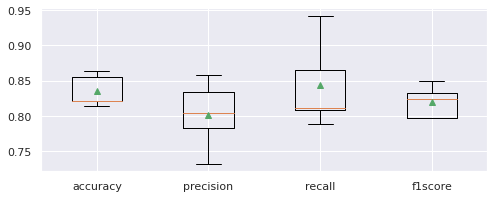

In [ ]:
diagrama_caja(result_cv)

Podemos observar como el comportamiento de nuestras métricas han resultado mucho más positivas de acuerdo podríamos ser ciertamente engañosas, si bien podíamos ver centrado nuestro “accuracy” podría determinar un buen valor, podríamos tener una interpretación errónea, igualmente podemos ver que nuestro recall no se encuentra tan centrado lo que al final se traduce en una mayor penalización de F1 a nuestro modelo ya que F1-score penaliza más los errores positivos (FN) que a los errores negativos (FP)


### **6.  Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, la que consideres más adecuada).** 
De ser necesario, realiza los ajustes necesarios para evitar alguno de estos problemas.

In [ ]:
def learning_curve_plot(modelo,score):

    pipeline = Pipeline(steps=[('ct', transformer),('m', modelo)])
    KFold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=random_state_v)
    train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=KFold, train_sizes=np.linspace(0.1, 1.0, 20), scoring=score)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, test_mean, color='red', marker='+', markersize=5, linestyle='--', label='Test')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(score)
    plt.grid()
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
X_train.shape

(586, 14)

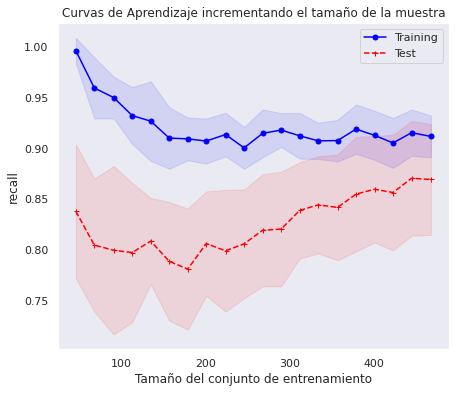

In [ ]:
learning_curve_plot(modelo,'recall')

Podemos observar que el comportamiento de nuestra curva de aprendizaje es capaz de demostrar un progreso favorable a medida que el bloque de datos va avanzando hasta irse normalizando, esto, nos demuestra que es capaz de poder adaptarse a las diferentes futuras métricas que pudiera recibir.
En acorde a esto podemos interpretar que no se encuentra sobre entrenada ya que aun cuando es “estable” su comportamiento presenta ligeras fluctuaciones pero éstas van en función a la cantidad de datos que se le van suministrando, incluso podemos observar que su constancia y estabilidad evitan que presente picos abruptos con los que entenderíamos errores en el modelo, al contrario, entre más datos tiene menor esfuerzo le toma para poder tomar las decisiones más acertadas.

### **7.  Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva.**

In [ ]:
pipeline = Pipeline(steps=[('ct', transformer),('m', modelo)])
pipeline.fit(X_train,y_train)
yhat = pipeline.predict(X_val)
print(yhat)

[0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1
 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0]


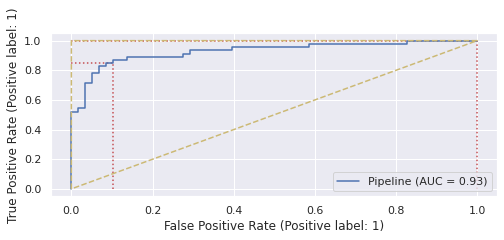

In [ ]:
# Obtenemos la tasa de falsos positivos (recall) y la tasa de verdaderos positivos (precision):
fpr, tpr, thresholds = metrics.roc_curve(y_val, yhat)


metrics.RocCurveDisplay.from_estimator(pipeline, X_val, y_val, pos_label=1)

plt.plot([0,0,1,0],[0,1,1,0], 'y--')

plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
plt.show() 

### **8.  Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score.**

In [ ]:
# def mi_f1score(yreal, ypred):
#   vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
#   f1score = (2*vp)/((2*vp) + (fp + fn))
#   return f1score

# def mi_gmean(yreal, ypred):
#   vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
#   recall =vp/(vp + fn)
#   especificidad = vn/(vn + fp)

#   gmean = np.sqrt(recall * especificidad)
#   return gmean

# def mi_recall(yreal, ypred):
#   vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
#   recall =vp / (vp + fn)
#   return recall

In [ ]:
pred_bin = pipeline.predict(X_val)
cm = confusion_matrix(y_val, yhat)

print(cm)

[[52  6]
 [ 7 39]]


In [ ]:
my0s = (y_val==0)
my1s = (y_val==1)

print(my0s.shape)
print(sum(my0s))
print(sum(my1s))

(104,)
58
46


In [ ]:
print(y_val[0:5])
print(my0s[0:5])

14     0
586    0
140    0
492    0
350    1
Name: A15, dtype: int64
14      True
586     True
140     True
492     True
350    False
Name: A15, dtype: bool


In [ ]:
pred0s  = pred_bin[my0s]
pred1s  = pred_bin[my1s]
print(pred0s.shape)   
print(pred1s.shape)

(58,)
(46,)


In [ ]:
print(pred1s.shape)
print(pred1s[0:5])  # En este caso, de las 5 primeras predicciones que debieron ser todas positivas,
                       # solo las primera y la quinta son correctas, y los tres de en medio son FN.-------> revisar

(46,)
[1 1 1 0 1]


In [ ]:
r0 = np.random.uniform(-0.5,0.5, size=pred0s.shape[0])    # Generamos aleatorios uniforme para el eje x
                                                          # de longitud el total de 0-TRUEs en X_val, entre
                                                          # algún intervalo deseado, que aquí usamos (-0.5, +0.5)

r1 = np.random.uniform(0.7,1.3, size=pred1s.shape[0])     # El análogo para 1-TRUEs de X_val. Pero para que aparezcan
                                                          # cercanos uno al otro, seleccionemos ahora el intervalo (+0.7, +1.3)

print(r0.shape)
#print(r0[0:5])
print(r1.shape)
#print(r1[0:5])

(58,)
(46,)


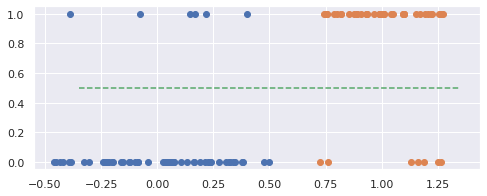

In [ ]:
plt.scatter(x=r0, y=pred0s)   # En teoría todos estos debieran ser menores a 0.5.
plt.scatter(x=r1, y=pred1s)   # Y todos estos debieran ser mayores a 0.5.

plt.hlines(0.5, -0.35, 1.35, color='g', linestyles='dashed')   # el primer valor es la constante para "y" y los otros 2 son 
                                                               # donde inicia y termina en el eje horizontal.
plt.show()

In [ ]:
# Cuando hacemos nuestras predicciones y obtenemos por ejemplo la matriz de confusión,
# de manera predeterminada se está considerando que 0.5 es el umbral para las clases negativa y positiva.

pred_bin = pipeline.predict(X_val)
cm = confusion_matrix(y_val, yhat)    # los renglones son los reales y las columnas las predicciones.
print(cm)

tt = np.sum(cm)
print('real-0: [%.5f, %.5f]' % (cm[0,0]/tt, cm[0,1]/tt))
print('real-1: [%.5f, %.5f]' % (cm[1,0]/tt, cm[1,1]/tt))

[[52  6]
 [ 7 39]]
real-0: [0.50000, 0.05769]
real-1: [0.06731, 0.37500]


In [ ]:
TPrate = (cm[0,0]*cm[0,0])/((cm[0,0]*cm[0,0])+(cm[1,0]+cm[0,1]))
FPrate = (cm[0,0]*cm[0,0])/((cm[0,0]*cm[0,0])+(cm[1,0]+cm[0,1]))
print('TP_rate-f1-score:%.5f' % TPrate)
print('FP_rate:%.5f' % FPrate)

# f1score = (2*vp)/((2*vp) + (fp + fn))


TP_rate-f1-score:0.99522
FP_rate:0.99522


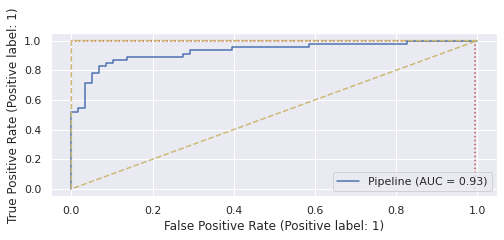

In [ ]:
metrics.RocCurveDisplay.from_estimator(pipeline, X_val, y_val)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(TPrate, 0, FPrate, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(FPrate, 0, TPrate, colors='r', linestyles='dotted')  # Pero el mejor umbral para que ambos errores estén lo más equilibrados
plt.show()                                                      # es el que se calcula con el círculo centrado en (0,1).

In [ ]:
roc_auc_score(y_val, yhat, average='macro', sample_weight=None, max_fpr=0.5)

0.8578739476415638

In [ ]:
vn, fp, fn, vp = confusion_matrix(y_val, yhat).ravel()
f1_score = (2*vp)/((2*vp) + (fp + fn))
print (f1_score)

0.8571428571428571


In [ ]:
#Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica g-mean.

#obtenemos las predicciones en formato probabilístico  de 1 y 0 para cada observación en el conjunto de validación.
yhat = pipeline.predict_proba(X_val)
yhat = yhat[:, 1]

#realizamos nuestras predicciones a la clase 1 o 0, con base al mejor umbral encontrado.
pred_bin = np.where(yhat > best_thresh, 1, 0)
pred_bin_05 = pipeline.predict(X_val)


print('casos donde FP y FN son igualmente de costosos: \n')
print('predicciones binarias con threshold=0.5: \n', confusion_matrix(y_val, pred_bin_05))

print('predicciones binarias con threshold optimizado: \n', confusion_matrix(y_val, pred_bin))

print('predicciones probabilisticas con threshold optimizado: \n', confusion_matrix(y_val, yhat))


AttributeError: ignored

In [ ]:
thresholds

array([2, 1, 0])

In [ ]:
# vn, fp, fn, vp = confusion_matrix(y_val, yhat).ravel() 
# TPrate = (2*vp)/((2*vp) + (fp + fn))
# FPrate = fp/(vn+fp)
# print('TP_rate-f1score:%.5f' % TPrate)
# print('FP_rate:%.5f' % FPrate)

:### **9.  Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica g-mean.**

Best Threshold=1.000000, G-Mean=0.872


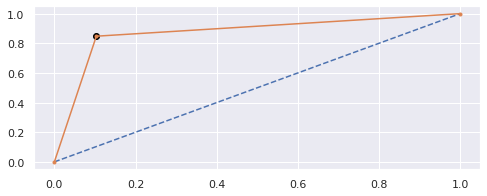

In [ ]:
from sklearn.metrics import roc_curve

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val, yhat)

# calculate g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# plot the point that corresponds to the maximum g-mean
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# show the plot
pyplot.show()

### **10. Incluye tus conclusiones finales de la actividad.**

Con esto podemos identificar todas las posibles variantes que podríamos manejar entre modelos, diferentes aspectos, parámetros, entre los clasificadores, probamos realizar las clasificaciones con los estratificadores, tal vez el proceso más simple para poder ir clasificando nuestra información, pudimos ver que si bien puede demostrar un comportamiento bueno, puede ser bajo en sus métricas (esto lo confirmamos con los resultados del F1 score obtenidos)
continuamos realizando métricas ahora con SVM, si bien este modelo nos permite crear un análisis realizando una separación de datos mucho más precisas, identificamos que nuestro modelo mejoró considerablemente ya que de rondar por debajo del 50% se logró llevar por arriba del 85% y que a su vez mejoró considerablemente el resto de nuestras métricas como el accuracy, la precisión y el recall.
Tras completar esta comparativa, ahora realizamos un análisis de “Área bajo la curva” o **AUC** por sus siglas en inglés utilizando la recepción operativa de características **ROC** por sus siglas en inglés, esta nos permitirá comprender el desempeño de nuestro modelo y entre más se acerque a 1 será más eficiente.
Durante el proceso de graficación pudimos observar como nuestro resultado del modelo en F1 nos arrojó 85.71% de eficiencia mientras que el Score de UAC nos dio el 85.78% como resumen especular que el modelo es lo suficientemente capaz de poder estratificar correctamente los casos que podamos plantearle a nuestro modelo.

*Como complemento, tenemos que saber que cuando un valor de AUC se encuentra por debajo del .5 significa que nuestro modelo no es capaz de clasificar o que no tenga la capacidad de ser separado correctamente, es decir que no podrá saber distinguir entre una correcta clasificación o una clasificación incorrecta, lo que por obvias razones nos llevará a decisiones incorrectas*


In [ ]:
None

*Referencias:*
<BR>
*Sheehy, P., Navarro, D., Silvers, R., Keyes, V., Dixon, D., & Picard, D. (2002). The Black Belt Memory Jogger: A Pocket Guide for Six Sigma Success (1st ed.). Goal/QPC.*
<BR>
*aman.ai | redirecting to homepage. . . (2022). Retrieved November 5, 2022, from https://Https://aman.ai/primers/si/interview/*
<BR>
*Minitab. (n.d.). Accuracy and precision in measurement systems. MinitabRetrieved November 6, 2022, from https://support.minitab.com/en-us/minitab/20/help-and-how-to/quality-and-process-improvement/measurement-system-analysis/supporting-topics/basics/accuracy-and-precision/*
<BR>
Sklearn.svm.SVC. (2007). scikit-learn. Retrieved November 6, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<BR>
Google. (2022). Machine Learning. 2022,Nov 06, de Classifications. Sitio web: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
<BR>
Sarang Narkhede. (2018). Understanding UAC - ROC Curve. 2022,Nov 06, de Understanding UAC - ROC Curve. Sitio web: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5


### **-- FIN DE ACTIVIDAD DE LA SEMANA 8**